<a href="https://colab.research.google.com/github/Zahra-Alikhani2004/ML_Final-project-/blob/main/Iran_Futsal_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               20 non-null     object 
 1   Birth_Year         20 non-null     object 
 2   Age                18 non-null     float64
 3   Height_m           20 non-null     float64
 4   Weight_kg          20 non-null     float64
 5   Position           20 non-null     object 
 6   Start_Pro_Age      20 non-null     float64
 7   Clubs              20 non-null     object 
 8   National_Team      20 non-null     object 
 9   Main_Achievements  20 non-null     object 
dtypes: float64(4), object(6)
memory usage: 1.7+ KB
None

Descriptive stats for numeric columns:
             Age   Height_m  Weight_kg  Start_Pro_Age
count  18.000000  20.000000  20.000000      20.000000
mean   41.944444   1.782500  73.400000      19.100000
std     7.802505   0.046552   3.067658       1.0

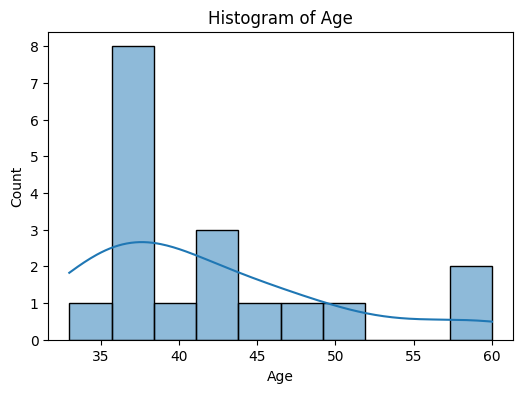

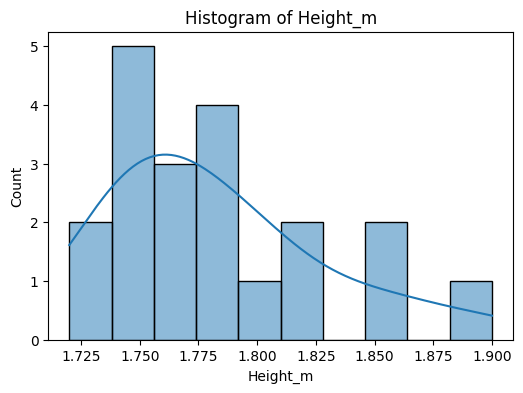

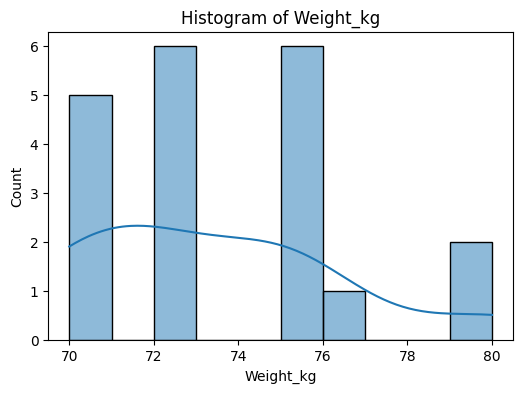

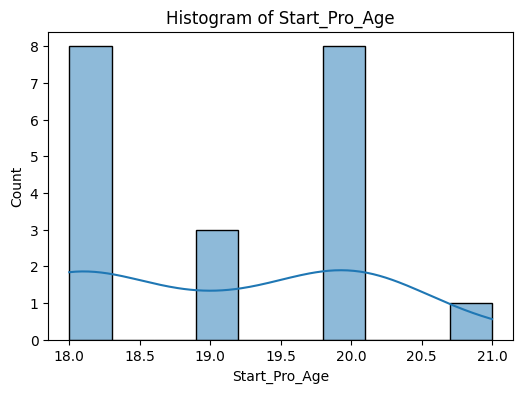

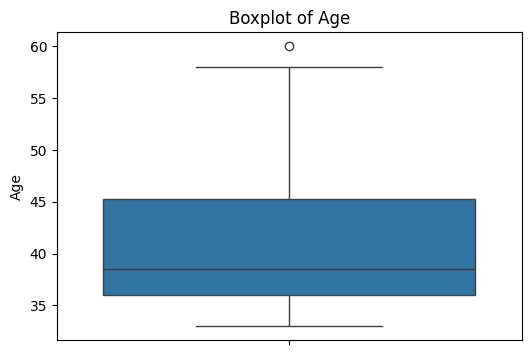

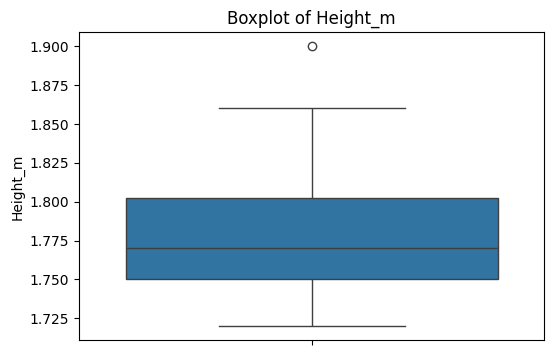

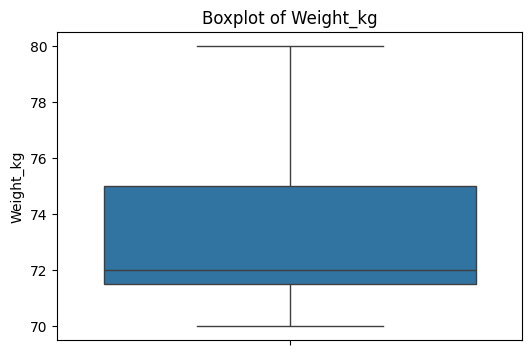

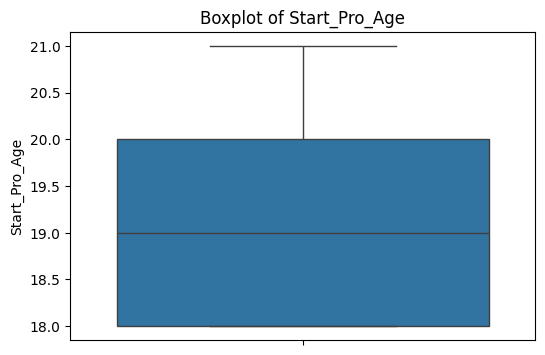

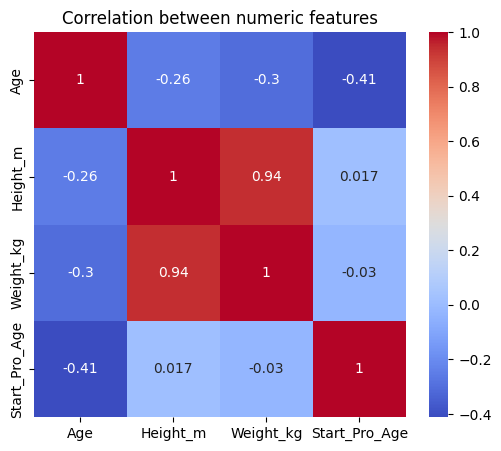

In [1]:
# ===============================
# 1️⃣ Import libraries
# ===============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ===============================
# 2️⃣ Load dataset from GitHub
# ===============================
url = "https://raw.githubusercontent.com/Zahra-Alikhani2004/ML_Final-project-/main/Iran_Futsal_Dataset/Iran_Futsal_Players.csv"
df = pd.read_csv(url)

# ===============================
# 3️⃣ Convert Persian numbers to English and to float
# ===============================
def persian_to_english_num(s):
    if pd.isnull(s):
        return np.nan
    s = str(s)
    persian_digits = "۰۱۲۳۴۵۶۷۸۹"
    english_digits = "0123456789"
    for p,e in zip(persian_digits, english_digits):
        s = s.replace(p,e)
    s = s.replace('٫','.')  # Persian decimal point to dot
    try:
        return float(s)
    except:
        return np.nan

numeric_cols = ['سن تقریبی','قد (متر)','وزن تقریبی (کیلو)','سن شروع حرفه‌ای']
for col in numeric_cols:
    df[col] = df[col].apply(persian_to_english_num)

# ===============================
# 4️⃣ Rename columns to English
# ===============================
df.rename(columns={
    'نام':'Name',
    'سال تولد':'Birth_Year',
    'سن تقریبی':'Age',
    'قد (متر)':'Height_m',
    'وزن تقریبی (کیلو)':'Weight_kg',
    'پست':'Position',
    'سن شروع حرفه‌ای':'Start_Pro_Age',
    'باشگاه‌ها':'Clubs',
    'تیم ملی':'National_Team',
    'افتخارات اصلی':'Main_Achievements'
}, inplace=True)

# ===============================
# 5️⃣ Overview
# ===============================
print("Dataset info:")
print(df.info())
print("\nDescriptive stats for numeric columns:")
print(df[['Age','Height_m','Weight_kg','Start_Pro_Age']].describe())
print("\nMissing values in numeric columns:")
print(df[['Age','Height_m','Weight_kg','Start_Pro_Age']].isnull().sum())

# ===============================
# 6️⃣ Histograms
# ===============================
for col in ['Age','Height_m','Weight_kg','Start_Pro_Age']:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=10)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

# ===============================
# 7️⃣ Boxplots
# ===============================
for col in ['Age','Height_m','Weight_kg','Start_Pro_Age']:
    plt.figure(figsize=(6,4))
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")
    plt.ylabel(col)
    plt.show()

# ===============================
# 8️⃣ Correlation heatmap
# ===============================
corr = df[['Age','Height_m','Weight_kg','Start_Pro_Age']].corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation between numeric features')
plt.show()